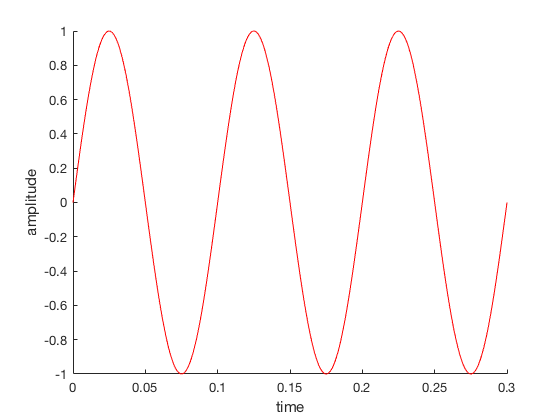

In [10]:
%%make some waves
% amp * cos(2 * pi * freq * (time + phase))
t = 0:.001:.3;
r = 1 * sin(2 * pi * 10 * t);
[fh,ah] = makefigure();
lh = line(t,r,'color','r','parent',ah);
xlabel('time')
ylabel('amplitude')

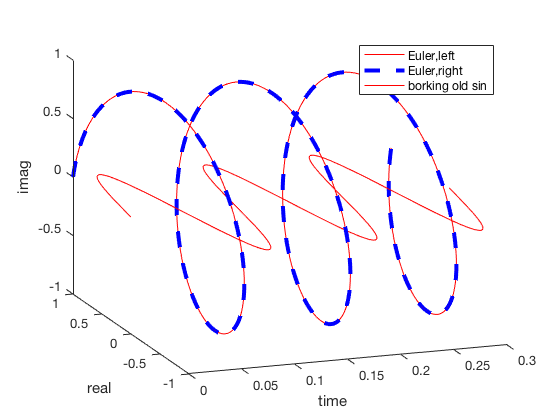

In [15]:
%%make some complex sin waves
% amp * exp(-1j * 2 * pi * freq * (t + phase))
% real() = -isin() 
% imag() = cos()
b = 1 * exp(1j * 2 * pi * 10 * t);
comp_sin = cos(2*pi*10*t) + i*sin(2*pi*10*t);
lh(1) = line(t,real(comp_sin),imag(comp_sin),'color','r');
lh(2)= line(t,real(b),imag(b),'linestyle','--','color', 'b','linewidth',3);
lh(3) = line(t,r,'color','r');

% pretty
xlabel('time')
ylabel('real')
zlabel('imag')
legend([lh(:)], {'Euler,left','Euler,right','borking old sin'}) 
view(-20,20)

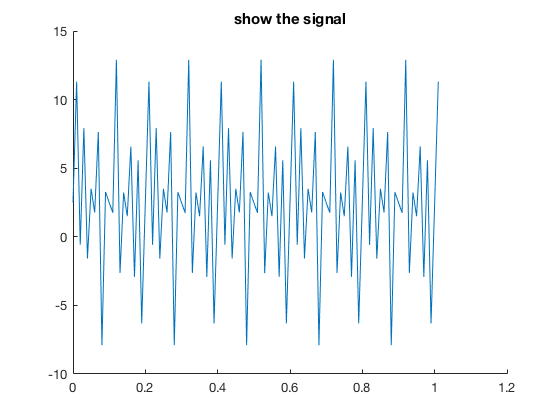

In [19]:
%% Make Signal

% parameters of the waves
amps = [2 3 4 5];
freaks = [10 20 35 45];
offs = [1 .5 1 0];
phs = [0 0 0 0];
binsize = .01;
tims = 0:binsize:1+binsize;
sig = zeros(numel(amps),numel(tims));

% build each wave
for idx = 1:numel(amps)
	sig(idx,:) = amps(idx) * sin(2*pi * freaks(idx)...
	* (tims + (2*pi*phs(idx)))) + offs(idx);
end

% sum up duh waves
tot_sig = sum(sig,1);
norm_tot_sig = tot_sig/norm(tot_sig);

% plot duh wave
[fh2,ah2] = makefigure();
lh2(1) = line(tims, tot_sig);
title(ah2,'show the signal');
%keyboard

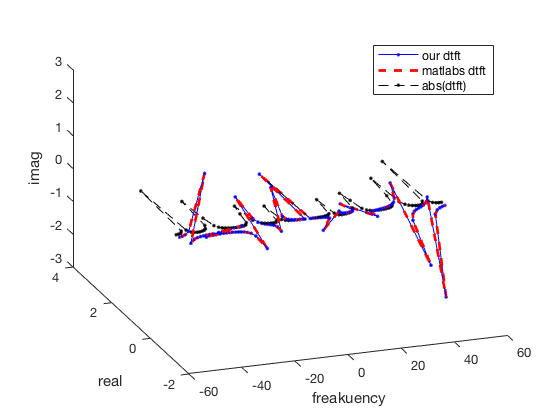

In [30]:
%% DTFT

% Lets just drop time temporarily lets think about our signal just as having a # of samples
% from the zeroth sample to the n-th sample.
samples = [0:numel(tims)-1] / numel(tims);

% nyquist limit (number of unique frequencies)
ny_lim = numel(tims)/2 + 1;

% largest frequency Hz
seconds = max(tims) - min(tims);
Hz = numel(samples)/seconds;
large_freak = Hz/2;

% dtft
four = zeros(size(tot_sig));
for fidx = 1:numel(samples) % length of the sequence
	sw = 1 * exp(-1j*2*pi*(fidx-1) .* samples);
	norm_sw = sw/norm(sw);
	four(fidx) = sum([tot_sig.*sw]);
end
ff = fft(tot_sig); % check just in case :-)

%% convert to useful scale
nf = numel(tims)/2 + 1;
freq_axis = linspace(0,large_freak,ny_lim);
freq_axis_plot = [-fliplr(freq_axis(2:end-1)),freq_axis];
man_four = four/numel(tot_sig);
mat_four = ff/numel(tot_sig);
[fh3,ah3] = makefigure();

% trick to get matlab to plot negative freq correctly
freq_index = [numel(freq_axis)+1:numel(freq_axis_plot),1:numel(freq_axis)];
p_man_four = man_four(freq_index);
p_mat_four = mat_four(freq_index);

% draw lines
lh3(3) = line(freq_axis_plot, real(abs(p_man_four)), imag(abs(p_man_four)),'linestyle','--','marker','.','color','k');
lh3(1) = line(freq_axis_plot, real(p_man_four), imag(p_man_four),'linestyle','-','marker','.','color','b');
lh3(2) = line(freq_axis_plot, real(p_mat_four), imag(p_mat_four),...
 'color','r','linewidth',2,'linestyle','--');
%lh3(3) = line(freq_axis_plot, real(abs(p_man_four)), imag(abs(p_man_four)),'linestyle','--','marker','.','color','k');

% pretty
legend(lh3(:),{'our dtft', 'matlabs dtft', 'abs(dtft)'});
xlabel('freakuency')
ylabel('real')
zlabel('imag')
view(-20,30)